In [1]:
from collections import defaultdict, Counter
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
data = \
[[['маляр', 'павлин', 'подрядчик', 'староста', 'столяр'],
  ['корнилий', 'маляр', 'павлин', 'подрядчик', 'староста', 'столяр', 'чугунов'],
  ['глафира', 'корнилий', 'маляр', 'мурзавецкая', 'подрядчик', 'староста', 'столяр', 'чугунов'],
  ['маляр', 'павлин', 'подрядчик', 'староста', 'столяр', 'чугунов'],
  ['влас', 'мурзавецкий', 'павлин'],
  ['влас', 'глафира', 'мурзавецкий', 'павлин'],
  ['мурзавецкая', 'мурзавецкий', 'павлин'],
  ['мурзавецкая', 'павлин'],
  ['мурзавецкая', 'павлин', 'чугунов'],
  ['анфуса', 'лыняев', 'мурзавецкая', 'павлин'],
  ['анфуса', 'купавина', 'мурзавецкая'],
  ['глафира', 'мурзавецкая', 'павлин']],
 [['купавина', 'чугунов'],
  ['анфуса', 'купавина', 'лыняев'],
  ['анфуса', 'глафира', 'купавина', 'мурзавецкая', 'мурзавецкий'],
  ['анфуса', 'купавина', 'мурзавецкая', 'мурзавецкий'],
  ['купавина', 'мурзавецкий'],
  ['мурзавецкая', 'мурзавецкий'],
  ['анфуса', 'глафира', 'купавина', 'мурзавецкая', 'мурзавецкий'],
  ['глафира', 'купавина'],
  ['купавина'],
  ['глафира', 'купавина']],
 [['горецкий', 'чугунов'],
  ['анфуса', 'глафира', 'купавина', 'лыняев'],
  ['глафира', 'лыняев'],
  ['анфуса', 'купавина', 'лыняев'],
  ['анфуса', 'мурзавецкий'],
  ['анфуса', 'лыняев', 'мурзавецкий'],
  ['глафира', 'горецкий', 'лыняев'],
  ['глафира', 'лыняев'],
  ['анфуса', 'глафира', 'лыняев']],
 [['глафира', 'купавина', 'лакей'],
  ['анфуса', 'глафира', 'купавина'],
  ['анфуса', 'беркутов', 'лыняев'],
  ['беркутов', 'купавина', 'лыняев'],
  ['беркутов', 'купавина', 'лакей'],
  ['беркутов', 'горецкий', 'купавина'],
  ['беркутов', 'купавина'],
  ['беркутов', 'купавина', 'лыняев'],
  ['глафира', 'лыняев'],
  ['беркутов', 'глафира', 'купавина', 'лакей', 'лыняев']],
 [['павлин', 'чугунов'],
  ['мурзавецкая', 'чугунов'],
  ['мурзавецкая', 'мурзавецкий', 'чугунов'],
  ['мурзавецкая', 'павлин', 'чугунов'],
  ['беркутов', 'мурзавецкая'],
  ['беркутов', 'чугунов'],
  ['анфуса', 'беркутов', 'купавина', 'мурзавецкая'],
  ['купавина', 'мурзавецкая'],
  ['беркутов', 'купавина', 'мурзавецкая'],
  ['беркутов', 'купавина', 'мурзавецкая', 'павлин', 'чугунов'],
  ['анфуса', 'беркутов', 'глафира', 'купавина', 'лыняев', 'мурзавецкая', 'павлин', 'чугунов'],
  ['мурзавецкая', 'мурзавецкий', 'чугунов']]]

## Матрица

In [3]:
drama_heroes = [hero for act in data for scene in act for hero in scene]
drama_heroes = list(sorted(set(drama_heroes)))
matrices = [np.array([[1 if hero in scene else 0 for scene in act] for hero in drama_heroes]) for act in data]

In [4]:
def rome(dec):
    return {1: 'I', 2: 'II', 3: 'III', 4: 'IV', 5: 'V', 6: 'VI'}[dec]

def col(act, scene):
    return rome(act) + '.' + str(scene)

def cols():
    return [col(n_act+1, n_scene+1) for n_act, act in enumerate(matrices) for n_scene in range(len(act[0]))]

matrix = np.hstack(matrices)
pd.DataFrame(matrix, index=drama_heroes, columns=cols())

,I.1,I.2,I.3,I.4,I.5,I.6,I.7,I.8,I.9,I.10,I.11,I.12,II.1,II.2,II.3,II.4,II.5,II.6,II.7,II.8,II.9,II.10,III.1,III.2,III.3,III.4,III.5,III.6,III.7,III.8,III.9,IV.1,IV.2,IV.3,IV.4,IV.5,IV.6,IV.7,IV.8,IV.9,IV.10,V.1,V.2,V.3,V.4,V.5,V.6,V.7,V.8,V.9,V.10,V.11,V.12
анфуса,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,1,0,0,1,0,0,0,0,1,0,1,1,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
беркутов,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,1,0,0,0,0,1,1,1,0,1,1,1,0
влас,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
глафира,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,1,1,0,0,0,1,1,1,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0
горецкий,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
корнилий,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
купавина,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1,1,0,1,1,1,1,0,1,0,1,0,0,0,0,0,1,1,0,1,1,1,1,1,0,1,0,0,0,0,0,0,1,1,1,1,1,0
лакей,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
лыняев,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,1,1,1,1,0,0,1,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0
маляр,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Мобильность

In [5]:
def mob(mat):
    return (np.sum(np.abs(mat[:, 1:] - mat[:, :-1]), axis=1) - 1) / (len(mat[0])-1)

index = list(range(1, len(matrices) + 1)) + ['пьеса']
mobility = list(map(mob, matrices + [matrix]))
mobility = pd.DataFrame(mobility, index=index, columns=drama_heroes).round(2).transpose()
mobility[mobility < 0] = ''
mobility

,1,2,3,4,5,пьеса
анфуса,0.09,0.33,0.5,0.11,0.27,0.33
беркутов,,,,0.22,0.27,0.13
влас,0.09,,,,,0.02
глафира,0.36,0.44,0.25,0.11,0.09,0.37
горецкий,,,0.25,0.11,,0.10
корнилий,0.09,,,,,0.02
купавина,0.09,0.11,0.38,0.33,0.09,0.33
лакей,,,,0.33,,0.10
лыняев,0.09,0.11,0.25,0.22,0.09,0.25
маляр,0,,,,,0.00


## Плотность

In [6]:
def dens(matrix):
#     print(np.count_nonzero(matrix), '/', matrix.size, sep='', end=', ')
    return np.count_nonzero(matrix)/matrix.size

In [7]:
print('Плотность всей пьесы:', round(dens(matrix), 2))

act_d = list(map(dens, matrices))
act_d_ = np.array(act_d).reshape(-1, 1)
scene_d = [[dens(c) for c in m.T] for m in matrices]
scene_d_ = pd.DataFrame(scene_d).values # to fill with nans
columns = list(range(1, len(scene_d_[0]) + 1)) + ['действия']
density = pd.DataFrame(np.hstack((scene_d_, act_d_)), columns=columns)
density.round(2).fillna('')

Плотность всей пьесы: 0.19


,1,2,3,4,5,6,7,8,9,10,11,12,действия
0,0.29,0.41,0.47,0.35,0.18,0.24,0.18,0.12,0.18,0.24,0.18,0.18,0.25
1,0.12,0.18,0.29,0.24,0.12,0.12,0.29,0.12,0.06,0.12,,,0.16
2,0.12,0.24,0.12,0.18,0.12,0.18,0.18,0.12,0.18,,,,0.16
3,0.18,0.18,0.18,0.18,0.18,0.18,0.12,0.18,0.12,0.29,,,0.18
4,0.12,0.12,0.18,0.18,0.12,0.12,0.24,0.12,0.18,0.29,0.47,0.18,0.19


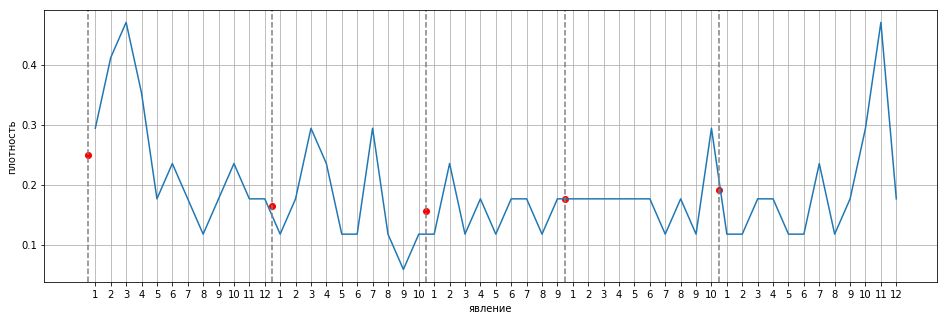

In [8]:
from itertools import accumulate

plt.subplots(figsize=(16, 5));

flat = [tup for act in scene_d for tup in enumerate(act, start=1)]
ticks, values = zip(*flat)
plt.plot(values);
plt.xticks(range(len(ticks)), ticks);

borders = np.array(list(accumulate(map(len, [[]] + scene_d))))
plt.scatter(borders[:-1]-0.5, act_d, c='red');
for x in borders[:-1]:
    plt.axvline(x-0.5, c='gray', ls='--');
    
plt.xlabel('явление');
plt.ylabel('плотность');
plt.grid();

## Расстояние

In [9]:
def dist(mat):
    n = len(drama_heroes)
    dist = np.zeros((n, n))*np.nan
    for i in range(n-1):
        for j in range(i+1, n):
            if np.sum(mat[i]) != 0 and np.sum(mat[j]) != 0:
                dist[i][j] = dist[j][i] = np.sum(np.abs(mat[i] - mat[j]))
    return dist/len(mat[0])

In [10]:
act_d = [dist(m) for m in matrices]
drama_d = dist(matrix)

In [15]:
distances = [pd.DataFrame(d, index=drama_heroes, columns=drama_heroes).stack() for d in act_d + [drama_d]]
distances = pd.concat(distances, axis=1)
distances.columns = list(range(1, len(act_d) + 1)) + ['пьеса']
distances.round(2).fillna('')

1    2     3    4     5  пьеса
анфуса      беркутов                      0.7  0.33   0.42
            влас         0.33                         0.32
            глафира      0.42  0.4  0.67  0.4  0.08   0.38
            горецкий                0.78  0.3         0.34
            корнилий     0.33                         0.32
            купавина     0.08  0.5  0.33  0.8  0.25   0.38
            лакей                         0.5         0.34
            лыняев       0.08  0.3  0.44  0.5  0.08   0.26
            маляр         0.5                         0.36
            мурзавецкая  0.42  0.2             0.67   0.42
            мурзавецкий  0.42  0.3  0.33       0.33   0.32
            павлин       0.83                  0.33   0.47
            подрядчик     0.5                         0.36
            староста      0.5                         0.36
            столяр        0.5                         0.36
            чугунов       0.5  0.5  0.67       0.67   0.51
беркутов    анфуса                        0.7  0.33   0.42
            влас                                      0.28
            глафира                       0.9  0.42   0.49
            горецкий                      0.6         0.26
            корнилий                                  0.28
            купавина                      0.3  0.25   0.34
            лакей                         0.6         0.23
            лыняев                        0.4  0.42   0.34
            маляр                                     0.32
            мурзавецкая                         0.5   0.45
            мурзавецкий                        0.67   0.47
            павлин                              0.5   0.43
            подрядчик                                 0.32
            староста                                  0.32
            столяр                                    0.32
            чугунов                            0.67   0.40
влас        анфуса       0.33                         0.32
            беркутов                                  0.28
            глафира      0.25                         0.32
            горецкий                                  0.09
            корнилий     0.33                         0.08
            купавина     0.25                         0.51
            лакей                                     0.09
            лыняев       0.25                         0.32
            маляр         0.5                         0.11
            мурзавецкая  0.75                         0.43
            мурзавецкий  0.08                         0.19
            павлин       0.67                         0.23
            подрядчик     0.5                         0.11
            староста      0.5                         0.11
            столяр        0.5                         0.11
            чугунов       0.5                         0.30
глафира     анфуса       0.42  0.4  0.67  0.4  0.08   0.38
            беркутов                      0.9  0.42   0.49
            влас         0.25                         0.32
            горецкий                0.56  0.5         0.34
            корнилий     0.25                         0.32
            купавина     0.33  0.5  0.56  0.6  0.33   0.45
            лакей                         0.3         0.30
            лыняев       0.33  0.5  0.22  0.5     0   0.30
            маляр        0.42                         0.36
            мурзавецкая   0.5  0.4             0.75   0.53
            мурзавецкий  0.33  0.5  0.78       0.25   0.43
            павлин       0.75                  0.25   0.47
            подрядчик    0.42                         0.36
            староста     0.42                         0.36
            столяр       0.42                         0.36
            чугунов      0.42  0.5  0.67       0.58   0.51
горецкий    анфуса                  0.78  0.3         0.34
            беркутов                      0.6         0.26
            влас                                      0.09
            глаф

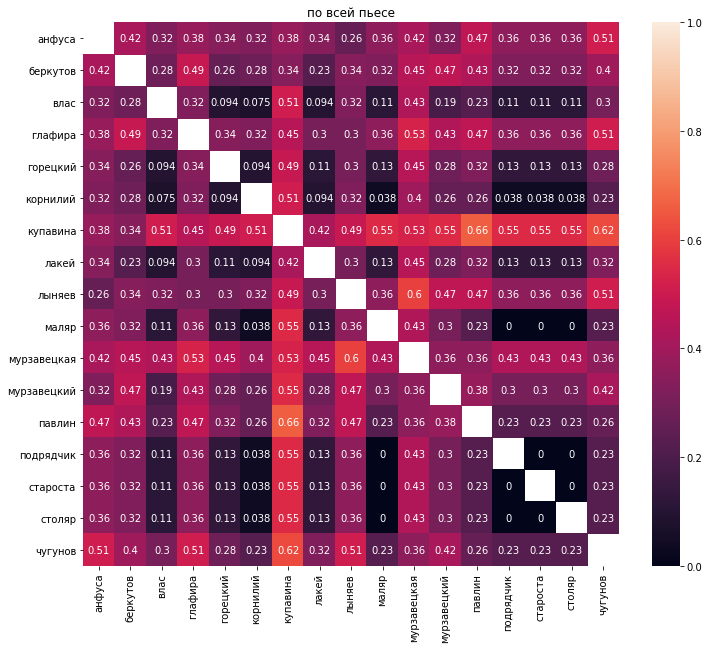

In [16]:
plt.subplots(figsize=(12, 10))
sns.heatmap(drama_d, vmin=0, vmax=1, annot=True, xticklabels=drama_heroes, yticklabels=drama_heroes)
plt.title('по всей пьесе');

## Абстрактные типы отношений (= соп., <> альт., > или < дом.)

In [17]:
for i, j in zip(*np.where(drama_d == 0)):
    if i != j and i < j:
        p = np.sum(matrix[i])
        q = np.sum(matrix[j])
        s = '=' if p == q else ('>' if p > q else '<')
        print(drama_heroes[i], s, drama_heroes[j])

маляр = подрядчик
маляр = староста
маляр = столяр
подрядчик = староста
подрядчик = столяр
староста = столяр


## Ранг

In [20]:
rank = [np.sum(np.sum(matrix, axis=0)[np.where(matrix[i] != 0)[0]] - 1) for i in range(len(drama_heroes))]
df = pd.DataFrame(dict(zip(drama_heroes, rank)), index=['ранг']).sort_values(by='ранг', axis=1, ascending=False)

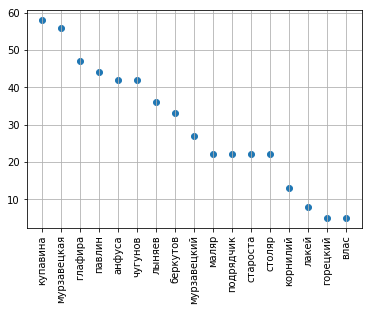

In [21]:
plt.scatter(range(len(drama_heroes)), df.values);
plt.xticks(range(len(drama_heroes)), df.columns, rotation=90);
plt.grid();

## Абсолютные относительные частоты

In [34]:
def freq(mat):
    return np.sum(mat, axis=1)/len(mat[0])

index = list(range(1, len(matrices) + 1)) + ['пьеса']
freq_abs = list(map(freq, matrices + [matrix]))
freq_abs = pd.DataFrame(freq_abs, index=index, columns=drama_heroes).round(2).transpose()
freq_abs.sort_values(by='пьеса', ascending=False)

,1,2,3,4,5,пьеса
купавина,0.08,0.9,0.22,0.8,0.42,0.47
мурзавецкая,0.58,0.4,0.00,0.0,0.83,0.40
глафира,0.25,0.4,0.56,0.4,0.08,0.32
анфуса,0.17,0.4,0.56,0.2,0.17,0.28
лыняев,0.08,0.1,0.78,0.5,0.08,0.28
павлин,0.83,0.0,0.00,0.0,0.33,0.26
чугунов,0.33,0.1,0.11,0.0,0.67,0.26
беркутов,0.00,0.0,0.00,0.7,0.50,0.25
мурзавецкий,0.25,0.5,0.22,0.0,0.17,0.23
маляр,0.33,0.0,0.00,0.0,0.00,0.08


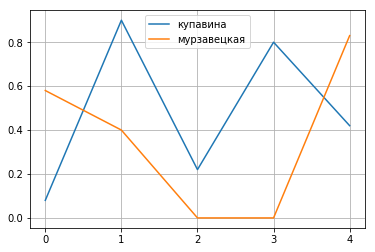

In [35]:
fig, ax = plt.subplots();
for freq_, name in zip(freq_abs.values, drama_heroes):
    if name == 'мурзавецкая' or name == 'купавина':
        ax.plot(freq_[:-1], label=name);
ax.set_xticks([0, 1, 2, 3, 4]);
plt.grid()
plt.legend();

## Условные относительные частоты

In [36]:
def rel_freq(mat):
    busyness = np.sum(mat, axis=1)
    freq_rel = np.zeros((len(drama_heroes), len(drama_heroes)))
    for i in range(len(mat)):
        for j in range(len(mat)):
            if busyness[j] == 0:
                freq_rel[i, j] = np.nan
            else:
                freq_rel[i, j] = np.count_nonzero(mat[i] + mat[j] - 2 == 0)/busyness[j]
    return freq_rel

for i, m in enumerate(matrices):
    print('Действие', i+1)
    pd.DataFrame(rel_freq(m), index=drama_heroes, columns=drama_heroes).round(2)
    
print('По всей пьесе')
pd.DataFrame(rel_freq(matrix), index=drama_heroes, columns=drama_heroes).round(2)

Действие 1


,анфуса,беркутов,влас,глафира,горецкий,корнилий,купавина,лакей,лыняев,маляр,мурзавецкая,мурзавецкий,павлин,подрядчик,староста,столяр,чугунов
анфуса,1.0,NaN,0.0,0.00,NaN,0.0,1.0,NaN,1.0,0.00,0.29,0.00,0.1,0.00,0.00,0.00,0.00
беркутов,0.0,NaN,0.0,0.00,NaN,0.0,0.0,NaN,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00
влас,0.0,NaN,1.0,0.33,NaN,0.0,0.0,NaN,0.0,0.00,0.00,0.67,0.2,0.00,0.00,0.00,0.00
глафира,0.0,NaN,0.5,1.00,NaN,0.5,0.0,NaN,0.0,0.25,0.29,0.33,0.2,0.25,0.25,0.25,0.25
горецкий,0.0,NaN,0.0,0.00,NaN,0.0,0.0,NaN,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00
корнилий,0.0,NaN,0.0,0.33,NaN,1.0,0.0,NaN,0.0,0.50,0.14,0.00,0.1,0.50,0.50,0.50,0.50
купавина,0.5,NaN,0.0,0.00,NaN,0.0,1.0,NaN,0.0,0.00,0.14,0.00,0.0,0.00,0.00,0.00,0.00
лакей,0.0,NaN,0.0,0.00,NaN,0.0,0.0,NaN,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00
лыняев,0.5,NaN,0.0,0.00,NaN,0.0,0.0,NaN,1.0,0.00,0.14,0.00,0.1,0.00,0.00,0.00,0.00
маляр,0.0,NaN,0.0,0.33,NaN,1.0,0.0,NaN,0.0,1.00,0.14,0.00,0.3,1.00,1.00,1.00,0.75


Действие 2


,анфуса,беркутов,влас,глафира,горецкий,корнилий,купавина,лакей,лыняев,маляр,мурзавецкая,мурзавецкий,павлин,подрядчик,староста,столяр,чугунов
анфуса,1.00,NaN,NaN,0.5,NaN,NaN,0.44,NaN,1.0,NaN,0.75,0.6,NaN,NaN,NaN,NaN,0.0
беркутов,0.00,NaN,NaN,0.0,NaN,NaN,0.00,NaN,0.0,NaN,0.00,0.0,NaN,NaN,NaN,NaN,0.0
влас,0.00,NaN,NaN,0.0,NaN,NaN,0.00,NaN,0.0,NaN,0.00,0.0,NaN,NaN,NaN,NaN,0.0
глафира,0.50,NaN,NaN,1.0,NaN,NaN,0.44,NaN,0.0,NaN,0.50,0.4,NaN,NaN,NaN,NaN,0.0
горецкий,0.00,NaN,NaN,0.0,NaN,NaN,0.00,NaN,0.0,NaN,0.00,0.0,NaN,NaN,NaN,NaN,0.0
корнилий,0.00,NaN,NaN,0.0,NaN,NaN,0.00,NaN,0.0,NaN,0.00,0.0,NaN,NaN,NaN,NaN,0.0
купавина,1.00,NaN,NaN,1.0,NaN,NaN,1.00,NaN,1.0,NaN,0.75,0.8,NaN,NaN,NaN,NaN,1.0
лакей,0.00,NaN,NaN,0.0,NaN,NaN,0.00,NaN,0.0,NaN,0.00,0.0,NaN,NaN,NaN,NaN,0.0
лыняев,0.25,NaN,NaN,0.0,NaN,NaN,0.11,NaN,1.0,NaN,0.00,0.0,NaN,NaN,NaN,NaN,0.0
маляр,0.00,NaN,NaN,0.0,NaN,NaN,0.00,NaN,0.0,NaN,0.00,0.0,NaN,NaN,NaN,NaN,0.0


Действие 3


,анфуса,беркутов,влас,глафира,горецкий,корнилий,купавина,лакей,лыняев,маляр,мурзавецкая,мурзавецкий,павлин,подрядчик,староста,столяр,чугунов
анфуса,1.0,NaN,NaN,0.4,0.0,NaN,1.0,NaN,0.57,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0
беркутов,0.0,NaN,NaN,0.0,0.0,NaN,0.0,NaN,0.00,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0
влас,0.0,NaN,NaN,0.0,0.0,NaN,0.0,NaN,0.00,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0
глафира,0.4,NaN,NaN,1.0,0.5,NaN,0.5,NaN,0.71,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0
горецкий,0.0,NaN,NaN,0.2,1.0,NaN,0.0,NaN,0.14,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.0
корнилий,0.0,NaN,NaN,0.0,0.0,NaN,0.0,NaN,0.00,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0
купавина,0.4,NaN,NaN,0.2,0.0,NaN,1.0,NaN,0.29,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0
лакей,0.0,NaN,NaN,0.0,0.0,NaN,0.0,NaN,0.00,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0
лыняев,0.8,NaN,NaN,1.0,0.5,NaN,1.0,NaN,1.00,NaN,NaN,0.5,NaN,NaN,NaN,NaN,0.0
маляр,0.0,NaN,NaN,0.0,0.0,NaN,0.0,NaN,0.00,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0


Действие 4


,анфуса,беркутов,влас,глафира,горецкий,корнилий,купавина,лакей,лыняев,маляр,мурзавецкая,мурзавецкий,павлин,подрядчик,староста,столяр,чугунов
анфуса,1.0,0.14,NaN,0.25,0.0,NaN,0.12,0.00,0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
беркутов,0.5,1.00,NaN,0.25,1.0,NaN,0.75,0.67,0.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
влас,0.0,0.00,NaN,0.00,0.0,NaN,0.00,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
глафира,0.5,0.14,NaN,1.00,0.0,NaN,0.38,0.67,0.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
горецкий,0.0,0.14,NaN,0.00,1.0,NaN,0.12,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
корнилий,0.0,0.00,NaN,0.00,0.0,NaN,0.00,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
купавина,0.5,0.86,NaN,0.75,1.0,NaN,1.00,1.00,0.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
лакей,0.0,0.29,NaN,0.50,0.0,NaN,0.38,1.00,0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
лыняев,0.5,0.57,NaN,0.50,0.0,NaN,0.38,0.33,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
маляр,0.0,0.00,NaN,0.00,0.0,NaN,0.00,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Действие 5


,анфуса,беркутов,влас,глафира,горецкий,корнилий,купавина,лакей,лыняев,маляр,мурзавецкая,мурзавецкий,павлин,подрядчик,староста,столяр,чугунов
анфуса,1.0,0.33,NaN,1.0,NaN,NaN,0.4,NaN,1.0,NaN,0.2,0.0,0.25,NaN,NaN,NaN,0.12
беркутов,1.0,1.00,NaN,1.0,NaN,NaN,0.8,NaN,1.0,NaN,0.5,0.0,0.50,NaN,NaN,NaN,0.38
влас,0.0,0.00,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.00,NaN,NaN,NaN,0.00
глафира,0.5,0.17,NaN,1.0,NaN,NaN,0.2,NaN,1.0,NaN,0.1,0.0,0.25,NaN,NaN,NaN,0.12
горецкий,0.0,0.00,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.00,NaN,NaN,NaN,0.00
корнилий,0.0,0.00,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.00,NaN,NaN,NaN,0.00
купавина,1.0,0.67,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,0.5,0.0,0.50,NaN,NaN,NaN,0.25
лакей,0.0,0.00,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.00,NaN,NaN,NaN,0.00
лыняев,0.5,0.17,NaN,1.0,NaN,NaN,0.2,NaN,1.0,NaN,0.1,0.0,0.25,NaN,NaN,NaN,0.12
маляр,0.0,0.00,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.00,NaN,NaN,NaN,0.00


По всей пьесе


,анфуса,беркутов,влас,глафира,горецкий,корнилий,купавина,лакей,лыняев,маляр,мурзавецкая,мурзавецкий,павлин,подрядчик,староста,столяр,чугунов
анфуса,1.00,0.23,0.0,0.35,0.00,0.0,0.40,0.00,0.53,0.00,0.33,0.42,0.14,0.00,0.00,0.00,0.07
беркутов,0.20,1.00,0.0,0.12,0.33,0.0,0.40,0.67,0.33,0.00,0.24,0.00,0.14,0.00,0.00,0.00,0.21
влас,0.00,0.00,1.0,0.06,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.17,0.14,0.00,0.00,0.00,0.00
глафира,0.40,0.15,0.5,1.00,0.33,0.5,0.36,0.67,0.53,0.25,0.24,0.25,0.21,0.25,0.25,0.25,0.14
горецкий,0.00,0.08,0.0,0.06,1.00,0.0,0.04,0.00,0.07,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.07
корнилий,0.00,0.00,0.0,0.06,0.00,1.0,0.00,0.00,0.00,0.50,0.05,0.00,0.07,0.50,0.50,0.50,0.14
купавина,0.67,0.77,0.0,0.53,0.33,0.0,1.00,1.00,0.47,0.00,0.43,0.33,0.14,0.00,0.00,0.00,0.21
лакей,0.00,0.15,0.0,0.12,0.00,0.0,0.12,1.00,0.07,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
лыняев,0.53,0.38,0.0,0.47,0.33,0.0,0.28,0.33,1.00,0.00,0.10,0.08,0.14,0.00,0.00,0.00,0.07
маляр,0.00,0.00,0.0,0.06,0.00,1.0,0.00,0.00,0.00,1.00,0.05,0.00,0.21,1.00,1.00,1.00,0.21


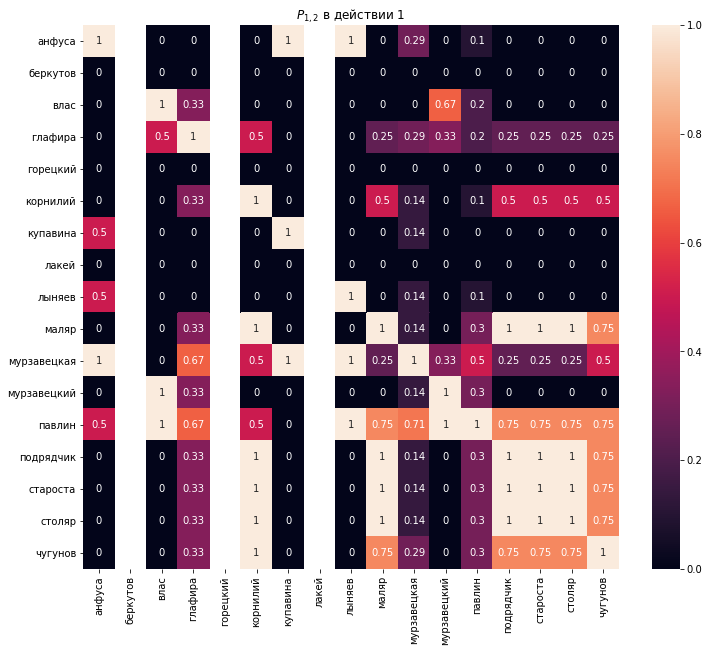

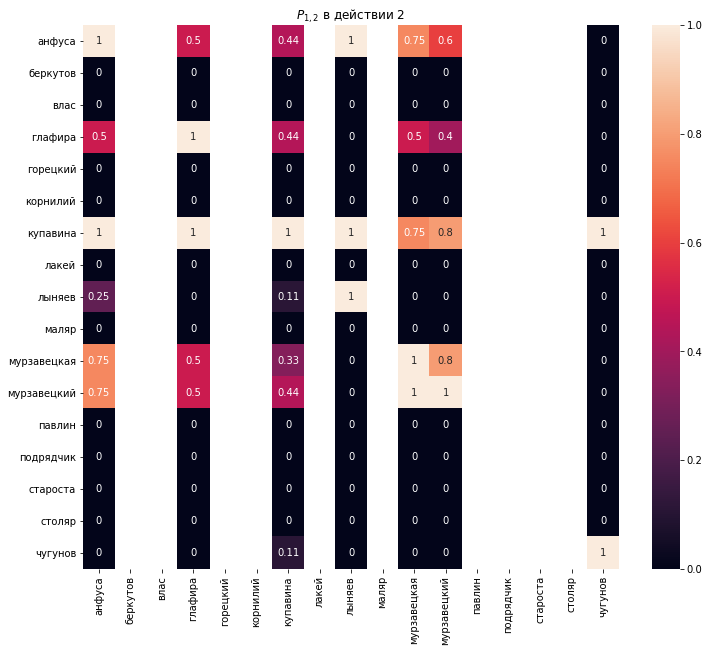

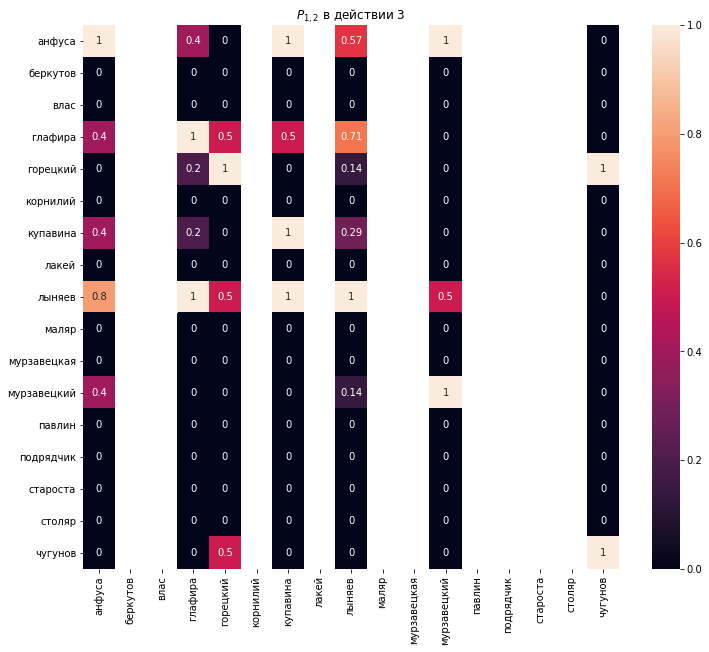

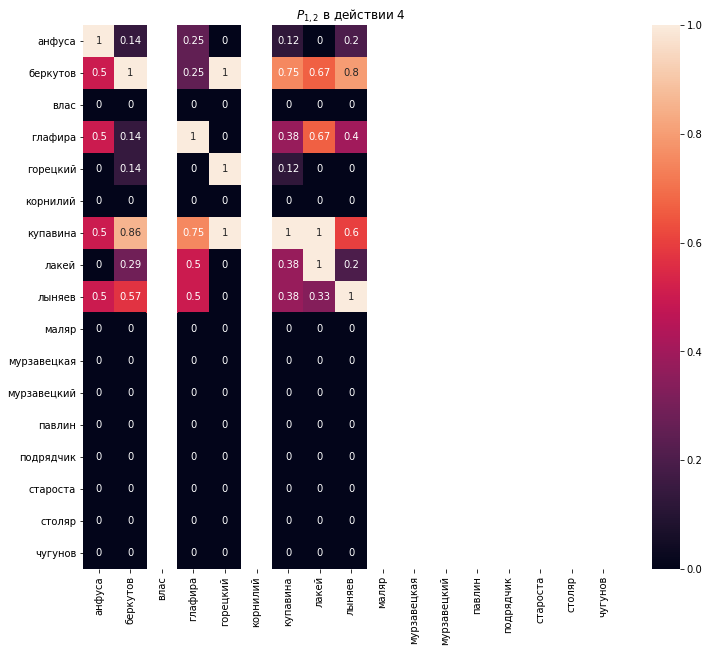

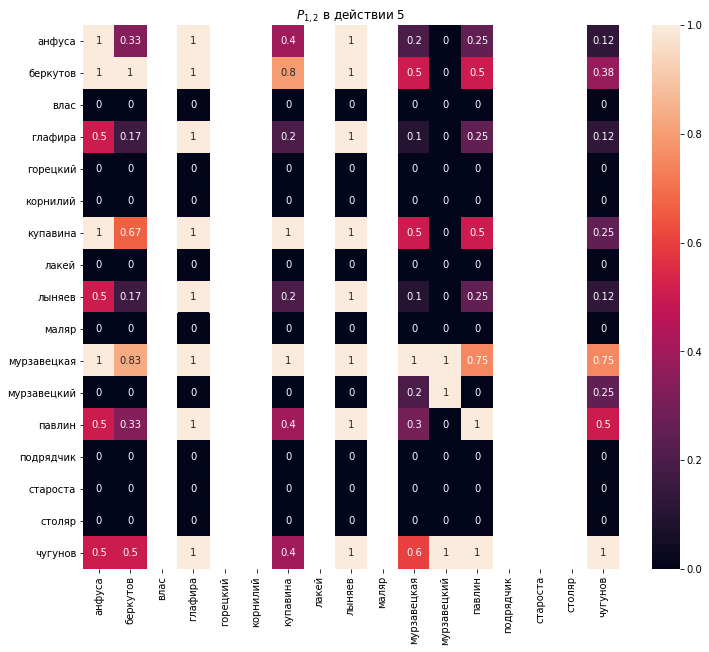

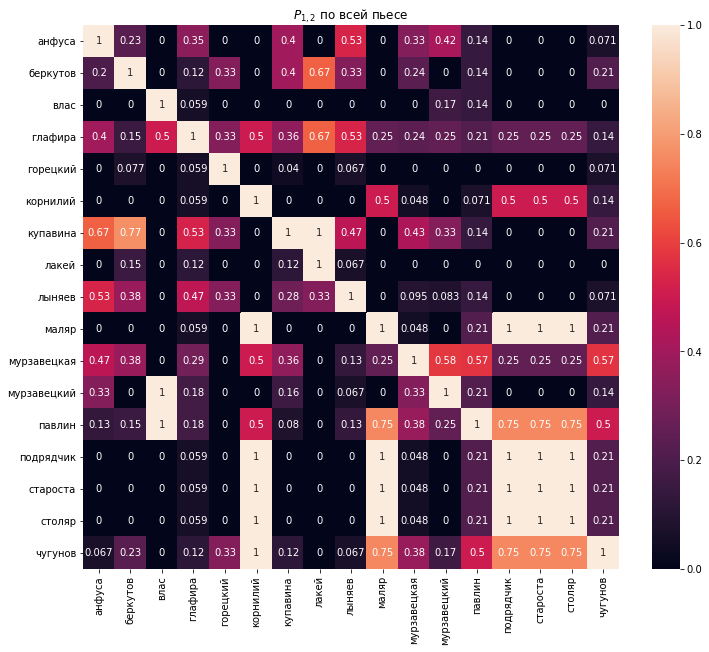

In [37]:
for i, m in enumerate(matrices):
    plt.subplots(figsize=(12, 10))
    sns.heatmap(rel_freq(m), vmin=0, vmax=1, annot=True, xticklabels=drama_heroes, yticklabels=drama_heroes)
    plt.title(r"$P_{1,2}$ в действии " + str(i+1));

plt.subplots(figsize=(12, 10))
sns.heatmap(rel_freq(matrix), vmin=0, vmax=1, annot=True, xticklabels=drama_heroes, yticklabels=drama_heroes)
plt.title(r"$P_{1,2}$ по всей пьесе");

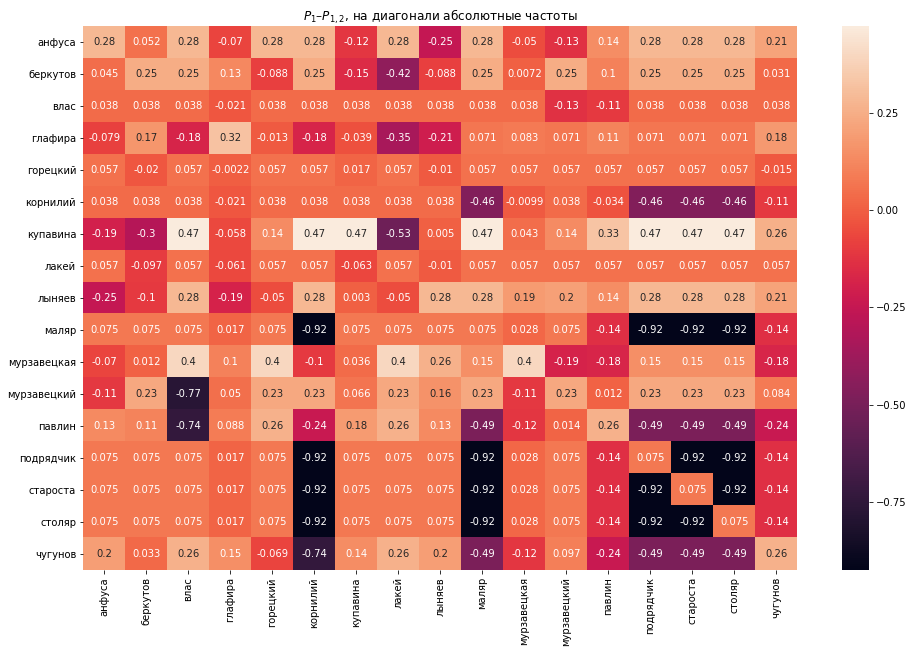

In [38]:
freq_abs = freq(matrix).reshape((-1, 1))
freq_rel = rel_freq(matrix)
freq_ = freq_abs - freq_rel
freq_[np.diag_indices(len(freq_[0]))] = freq_abs.ravel()
plt.subplots(figsize=(16, 10))
sns.heatmap(freq_, annot=True, xticklabels=drama_heroes, yticklabels=drama_heroes)
plt.title(r"$P_1 – P_{1,2}$, на диагонали абсолютные частоты");